<h1><center>Customer Revenue Prediction</center></h1>

<b>Problem: An ecommerce site wants to roll out a new multimillion dollar ad campaign. Therefore, they are utilizing clickstream and website analytics data from existing customers in order to predict whether or not a customer will be revenue-generating. This analysis will be used to optimize the website and external ad placement in order to entice and attract more revenue-generating customers.</b>

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

## Data Wrangling

In [2]:
#Load the dataset
df = pd.read_csv('online_shoppers_intention.csv')
print(df.shape)

(12330, 18)


In [3]:
#Print the first several rows of the data
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

<b>Identify Columns with Missing Values</b>

In [5]:
#Determine the columns that have missing values
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
Administrative,0,0.0
VisitorType,0,0.0
TrafficType,0,0.0
Region,0,0.0
Browser,0,0.0
OperatingSystems,0,0.0
Month,0,0.0
SpecialDay,0,0.0
PageValues,0,0.0
ExitRates,0,0.0


<b>None of the columns have missing values.</b>

<b>Identify Duplicate Rows</b>

In [6]:
#Examine dataset for duplicate values
duplicateRows = df[df.duplicated()]
print(duplicateRows)

       Administrative  Administrative_Duration  Informational  \
158                 0                      0.0              0   
159                 0                      0.0              0   
178                 0                      0.0              0   
418                 0                      0.0              0   
456                 0                      0.0              0   
...               ...                      ...            ...   
11934               0                      0.0              0   
11938               0                      0.0              0   
12159               0                      0.0              0   
12180               0                      0.0              0   
12185               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
158                       0.0               1                      0.0   
159                       0.0               1                      0.0 

<b>There appears to be 125 duplicate rows. The duplicated rows will need to be removed.</b>

In [7]:
#Drop duplicates
df = df.drop_duplicates()
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


<b>The dataset now has 12205 rows. The first 10 columns are numerical (Administrative, Administrative_Duration, Informational, Informational_ Duration, ProductRelated, ProductRelated, ProductRelated_Duration, BounceRates, ExitRates, PageValues, SpecialDay) and the last 8 are categorical (Month, OperatingSystems, Browser, Region, TrafficType, VisitorType, Weekend, and Revenue).</b>

In [8]:
#Examine summary statistics for numerical columns (Note: the last 4 columns are categorical) 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12205.0,2.338878,3.330436,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12205.0,81.646331,177.491845,0.0,0.000000,9.000000,94.700000,3398.750000
Informational,12205.0,0.508726,1.275617,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12205.0,34.825454,141.424807,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12205.0,32.045637,44.593649,0.0,8.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12205.0,1206.982457,1919.601400,0.0,193.000000,608.942857,1477.154762,63973.522230
BounceRates,12205.0,0.020370,0.045255,0.0,0.000000,0.002899,0.016667,0.200000
ExitRates,12205.0,0.041466,0.046163,0.0,0.014231,0.025000,0.048529,0.200000
PageValues,12205.0,5.949574,18.653671,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12205.0,0.061942,0.199666,0.0,0.000000,0.000000,0.000000,1.000000


In [9]:
#Shape of dataset 
df.shape

(12205, 18)

## Exploratory Data Analysis

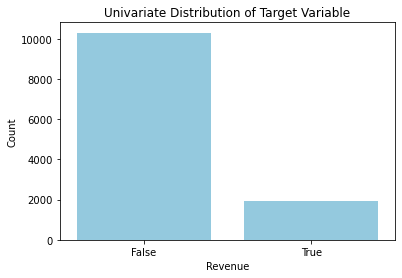

In [10]:
#Univariate Chart of Target 
sns.countplot(x="Revenue", data=df, color="skyblue")
plt.xlabel("Revenue")
plt.ylabel("Count")
plt.title("Univariate Distribution of Target Variable")
plt.show()

In [11]:
#Total Nonrevenue vs Revenue
df['Revenue'].value_counts() 

False    10297
True      1908
Name: Revenue, dtype: int64

<b>The dataset is imbalanced (nonrevenue: 84.4% and revenue: 15.6%)</b> 

<b>Univariate Analysis of Numerical Variables</b>

In [12]:
df_numerical = df[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']]

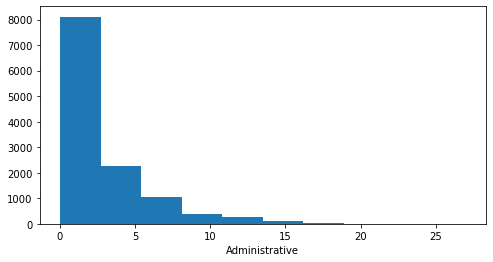

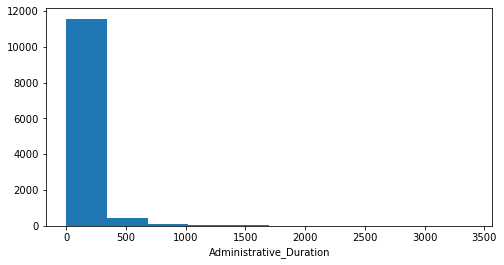

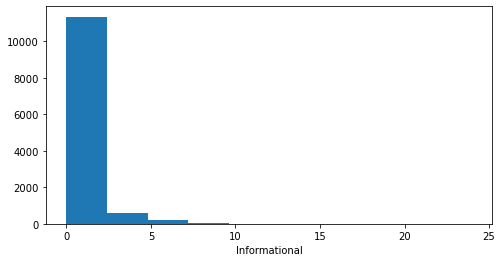

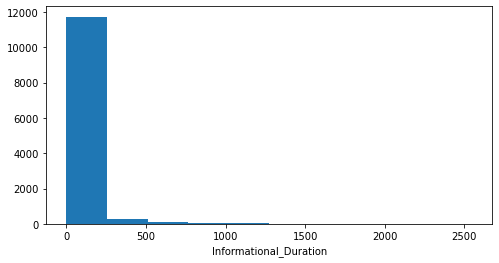

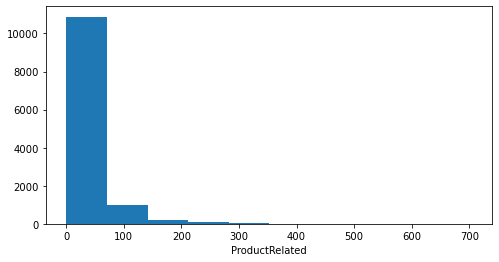

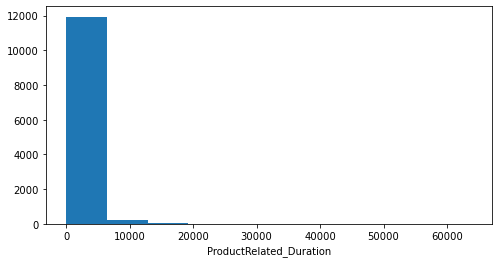

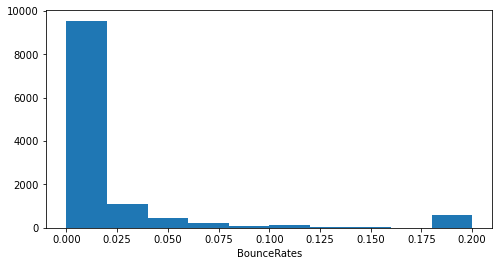

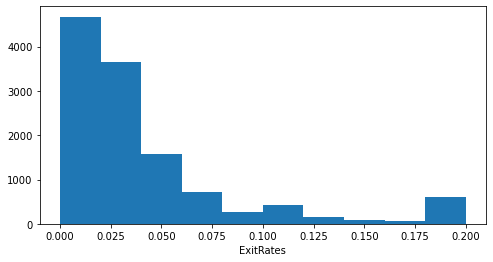

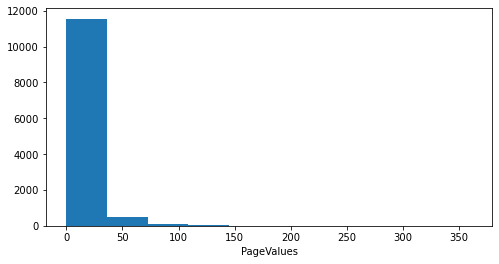

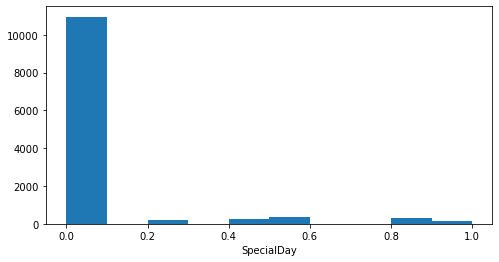

In [13]:
for columns in list(df_numerical.columns):
    plt.figure(figsize=(8, 4))
    plt.hist(df_numerical[columns])
    plt.xlabel(columns)
    plt.show()

<b>The numerical features exhibit a strongly right skewed distribution demonstrating that the number of administrative, informational, and product-related pages viewed by customers are low. In addition, the length of time spent on these pages are also low. The bounce rate, exit rate, and page value features data also demonstrated a right-skewed distribution. Lastly, it looks like the vast majority of visits occurred around the holidays (e.g., Mother's Day).</b>

<b>Univariate Analysis of Categorical Features</b>

<b>Univariate Distribution of the Month Variable</b>

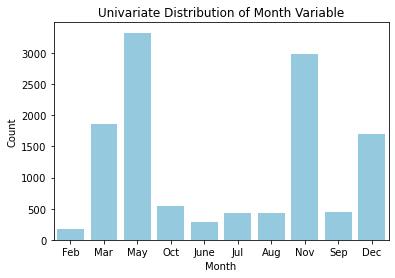

In [14]:
#Univariate Chart of Month 
sns.countplot(x="Month", data=df, color="skyblue")
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Univariate Distribution of Month Variable")
plt.show()

In [15]:
df['Month'].value_counts()

May     3329
Nov     2982
Mar     1860
Dec     1706
Oct      549
Sep      448
Aug      433
Jul      432
June     285
Feb      181
Name: Month, dtype: int64

<b>One can assume that a negligible amount of customers (or none) visited the site in January and April. The majority of customers visited the site in May and November.</b>

<b>Univariate Distribution of the Operating Systems Variable</b>

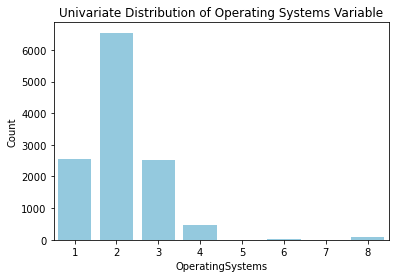

In [16]:
#Univariate Chart of OperatingSystems 
sns.countplot(x="OperatingSystems", data=df, color="skyblue")
plt.xlabel("OperatingSystems")
plt.ylabel("Count")
plt.title("Univariate Distribution of Operating Systems Variable")
plt.show()

In [17]:
df['OperatingSystems'].value_counts()

2    6541
1    2549
3    2530
4     478
8      75
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

<b>Of the 7 different operating systems identified, the majority of customers are using 1 of 3 (i.e., 95% of customers).</b>

<b>Univariate Distribution of Browser Variable</b>

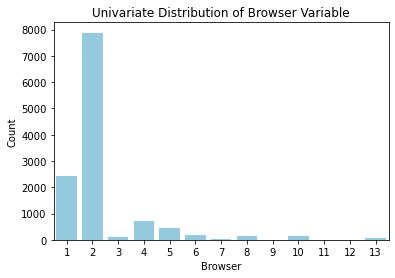

In [18]:
#Univariate Chart of Browser 
sns.countplot(x="Browser", data=df, color="skyblue")
plt.xlabel("Browser")
plt.ylabel("Count")
plt.title("Univariate Distribution of Browser Variable")
plt.show()

In [19]:
df['Browser'].value_counts()

2     7883
1     2427
4      731
5      465
6      174
10     163
8      135
3      105
13      56
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

<b>Of the 13 different browsers identified, the majority of customers are using 1 of 2 (i.e.,84% of customers).</b>

<b>Univariate Distribution of Region Variable</b>

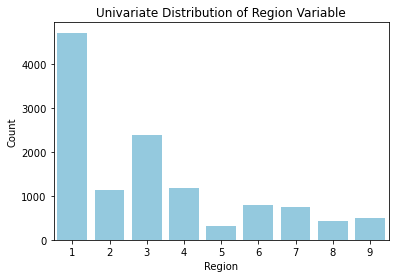

In [20]:
#Univariate Chart of Region 
sns.countplot(x="Region", data=df, color="skyblue")
plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Univariate Distribution of Region Variable")
plt.show()

In [21]:
df['Region'].value_counts()

1    4714
3    2379
4    1171
2    1128
6     801
7     758
9     505
8     431
5     318
Name: Region, dtype: int64

<b>Of the 7 different regions identified, the majority of customers are from regions 1-4 (i.e.,77% of customers).</b>

<b>Univariate Distribution of Traffic Type Variable</b>

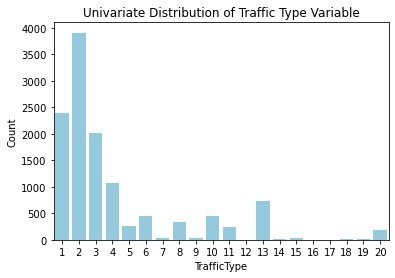

In [22]:
#Univariate Chart of TrafficType 
sns.countplot(x="TrafficType", data=df, color="skyblue")
plt.xlabel("TrafficType")
plt.ylabel("Count")
plt.title("Univariate Distribution of Traffic Type Variable")
plt.show()

In [23]:
df['TrafficType'].value_counts()

2     3911
1     2388
3     2013
4     1066
13     728
10     450
6      443
8      343
5      260
11     247
20     193
9       41
7       40
15      37
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

<b>Of the 20 types of website traffic identified (e.g., direct, referral, social, etc.), the majority of customers arrived at the website via traffic types 1-4 (i.e.,77% of customers).</b>

<b>Univariate Distribution of Visitor Type Variable</b>

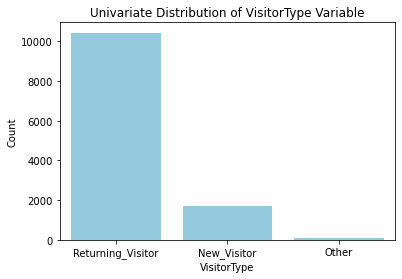

In [24]:
#Univariate Chart of Visitor Type 
sns.countplot(x="VisitorType", data=df, color="skyblue")
plt.xlabel("VisitorType")
plt.ylabel("Count")
plt.title("Univariate Distribution of VisitorType Variable")
plt.show()

In [25]:
df['VisitorType'].value_counts()

Returning_Visitor    10431
New_Visitor           1693
Other                   81
Name: VisitorType, dtype: int64

<b>The majority of visitors are those who have in the past.</b>

<b>Univariate Distribution of Weekend Variable</b>

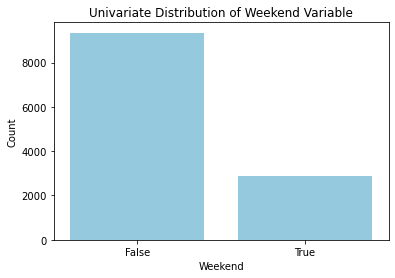

In [26]:
#Univariate Chart of Weekend 
sns.countplot(x="Weekend", data=df, color="skyblue")
plt.xlabel("Weekend")
plt.ylabel("Count")
plt.title("Univariate Distribution of Weekend Variable")
plt.show()

In [27]:
df['Weekend'].value_counts()

False    9346
True     2859
Name: Weekend, dtype: int64

<b>The majority of traffic occured during the week versus the weekend (77% vs 23%).</b>

<b>Correlation Matrix Heatmap</b>

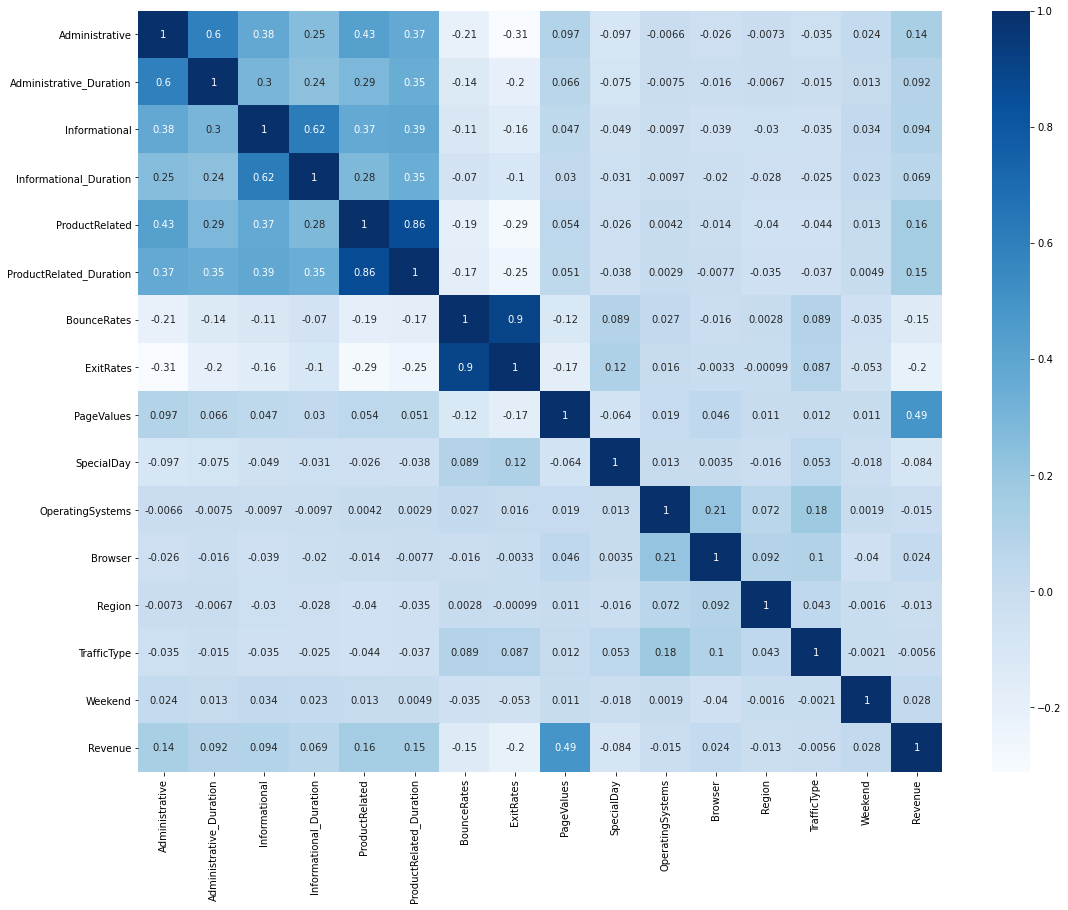

In [28]:
plt.figure(figsize=(18,14))
sns.heatmap(df.corr(), annot=True,cmap ='Blues')

<b>The following variables are highly correlated: (1) ProductRelated and ProductRelated_Duration (corr score = 0.86) and (2) BounceRates and ExitRates (corr score = 0.9). Of the numerical features, PageValues and ExitRates appear to exhibit a higher correlation with the target feature.

<h1><center>QUESTIONS</center></h1>

<b>Are the differences between nonrevenue- and revenue-generating customers for each numerical feature statistical significant?</b>

<b>'Administrative' Data</b>

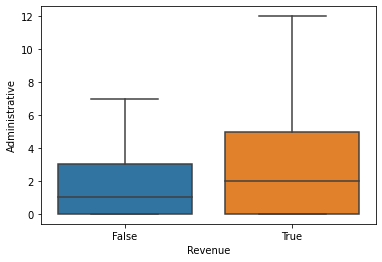

count    10297.000000
mean         2.143440
std          3.213298
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         27.000000
Name: Administrative, dtype: float64
count    1908.000000
mean        3.393606
std         3.730527
min         0.000000
25%         0.000000
50%         2.000000
75%         5.000000
max        26.000000
Name: Administrative, dtype: float64
(-15.201913434576094, 1.0213483852306189e-51)


In [29]:
#'Administrative' vs target 
sns.boxplot(y="Administrative", x= "Revenue", data=df, showfliers=False)
plt.show()

#Stats for Administrative data
print((df.loc[df["Revenue"] == 0,"Administrative"]).describe())
print((df.loc[df["Revenue"] == 1,"Administrative"]).describe())

#Significance Testing: Calculate p-value for two sampled T-test
stat, p = ttest_ind(df.loc[df["Revenue"] == 0,"Administrative"], df.loc[df["Revenue"] == 1,"Administrative"])
print((stat, p))

<b>'Administrative_Duration' Data</b>

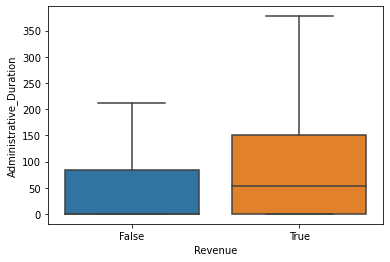

count    10297.000000
mean        74.635276
std        171.858685
min          0.000000
25%          0.000000
50%          0.000000
75%         84.550000
max       3398.750000
Name: Administrative_Duration, dtype: float64
count    1908.000000
mean      119.483244
std       201.114732
min         0.000000
25%         0.000000
50%        52.366667
75%       151.083333
max      2086.750000
Name: Administrative_Duration, dtype: float64
(-10.18025411418066, 3.0361856305051295e-24)


In [30]:
#'Administrative_Duration' vs target 
sns.boxplot(y="Administrative_Duration", x= "Revenue", data=df, showfliers=False)
plt.show()

#Stats for Administrative_Duration data
print((df.loc[df["Revenue"] == 0,"Administrative_Duration"]).describe())
print((df.loc[df["Revenue"] == 1,"Administrative_Duration"]).describe())

#Significance Testing: Calculate p-value for two sampled T-test
stat, p = ttest_ind(df.loc[df["Revenue"] == 0,"Administrative_Duration"], df.loc[df["Revenue"] == 1,"Administrative_Duration"])
print((stat, p))

<b>'Informational' Data</b>

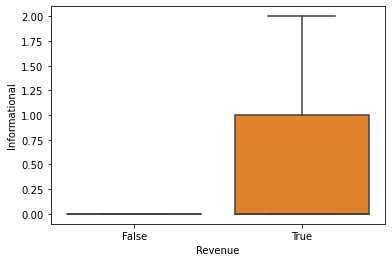

count    10297.000000
mean         0.457318
std          1.217885
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         24.000000
Name: Informational, dtype: float64
count    1908.000000
mean        0.786164
std         1.521176
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        12.000000
Name: Informational, dtype: float64
(-10.388239160885522, 3.571243773003708e-25)


In [31]:
#'Informational' vs target 
sns.boxplot(y="Informational", x= "Revenue", data=df, showfliers=False)
plt.show()

#Stats for Informational data
print((df.loc[df["Revenue"] == 0,"Informational"]).describe())
print((df.loc[df["Revenue"] == 1,"Informational"]).describe())

#Significance Testing: Calculate p-value for two sampled T-test
stat, p = ttest_ind(df.loc[df["Revenue"] == 0,"Informational"], df.loc[df["Revenue"] == 1,"Informational"])
print((stat, p))

<b>'Informational_Duration' Data</b>

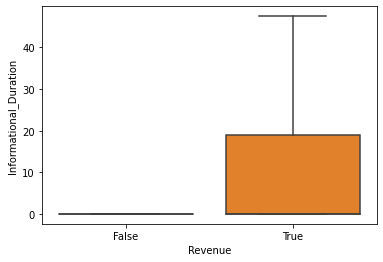

count    10297.000000
mean        30.603289
std        134.678026
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2549.375000
Name: Informational_Duration, dtype: float64
count    1908.000000
mean       57.611427
std       171.619131
min         0.000000
25%         0.000000
50%         0.000000
75%        19.000000
max      1767.666667
Name: Informational_Duration, dtype: float64
(-7.680226059722732, 1.7091065834753378e-14)


In [32]:
#'Informational_Duration' vs target 
sns.boxplot(y="Informational_Duration", x= "Revenue", data=df, showfliers=False)
plt.show()

#Stats for Informational_Duration data
print((df.loc[df["Revenue"] == 0,"Informational_Duration"]).describe())
print((df.loc[df["Revenue"] == 1,"Informational_Duration"]).describe())

#Significance Testing: Calculate p-value for two sampled T-test
stat, p = ttest_ind(df.loc[df["Revenue"] == 0,"Informational_Duration"], df.loc[df["Revenue"] == 1,"Informational_Duration"])
print((stat, p))

<b>'ProductRelated' Data</b>

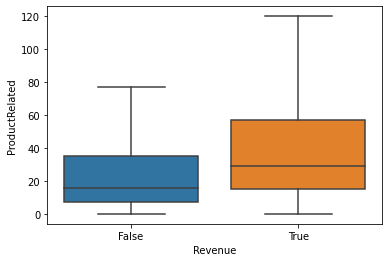

count    10297.000000
mean        29.050403
std         40.876473
min          0.000000
25%          7.000000
50%         16.000000
75%         35.000000
max        705.000000
Name: ProductRelated, dtype: float64
count    1908.000000
mean       48.210168
std        58.267365
min         0.000000
25%        15.000000
50%        29.000000
75%        57.000000
max       534.000000
Name: ProductRelated, dtype: float64
(-17.45130046430855, 2.2082525580487782e-67)


In [33]:
#'ProductRelated' vs target 
sns.boxplot(y="ProductRelated", x= "Revenue", data=df, showfliers=False)
plt.show()

#Stats for ProductRelated data
print((df.loc[df["Revenue"] == 0,"ProductRelated"]).describe())
print((df.loc[df["Revenue"] == 1,"ProductRelated"]).describe())

#Significance Testing: Calculate p-value for two sampled T-test
stat, p = ttest_ind(df.loc[df["Revenue"] == 0,"ProductRelated"], df.loc[df["Revenue"] == 1,"ProductRelated"])
print((stat, p))

<b>'ProductRelated_Duration' Data</b>

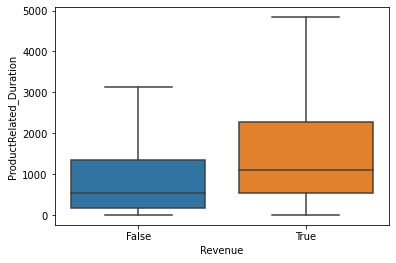

count    10297.000000
mean      1082.976881
std       1810.834046
min          0.000000
25%        159.500000
50%        526.000000
75%       1345.755952
max      63973.522230
Name: ProductRelated_Duration, dtype: float64
count     1908.000000
mean      1876.209615
std       2312.214392
min          0.000000
25%        541.906250
50%       1109.906250
75%       2266.011310
max      27009.859430
Name: ProductRelated_Duration, dtype: float64
(-16.76849843588279, 2.0685665781392302e-62)


In [34]:
#'ProductRelated_Duration' vs target 
sns.boxplot(y="ProductRelated_Duration", x= "Revenue", data=df, showfliers=False)
plt.show()

#Stats for ProductRelated_Duration data
print((df.loc[df["Revenue"] == 0,"ProductRelated_Duration"]).describe())
print((df.loc[df["Revenue"] == 1,"ProductRelated_Duration"]).describe())

#Significance Testing: Calculate p-value for two sampled T-test
stat, p = ttest_ind(df.loc[df["Revenue"] == 0,"ProductRelated_Duration"], df.loc[df["Revenue"] == 1,"ProductRelated_Duration"])
print((stat, p))

<b>'BounceRates' Data</b>

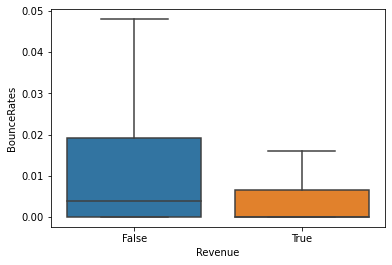

count    10297.000000
mean         0.023197
std          0.048466
min          0.000000
25%          0.000000
50%          0.003922
75%          0.019259
max          0.200000
Name: BounceRates, dtype: float64
count    1908.000000
mean        0.005117
std         0.012185
min         0.000000
25%         0.000000
50%         0.000000
75%         0.006452
max         0.200000
Name: BounceRates, dtype: float64
(16.199221400522447, 2.074007423178065e-58)


In [35]:
#'BounceRates' vs target 
sns.boxplot(y="BounceRates", x= "Revenue", data=df, showfliers=False)
plt.show()

#Stats for BounceRates data
print((df.loc[df["Revenue"] == 0,"BounceRates"]).describe())
print((df.loc[df["Revenue"] == 1,"BounceRates"]).describe())

#Significance Testing: Calculate p-value for two sampled T-test
stat, p = ttest_ind(df.loc[df["Revenue"] == 0,"BounceRates"], df.loc[df["Revenue"] == 1,"BounceRates"])
print((stat, p))

<b>'ExitRates' Data</b>

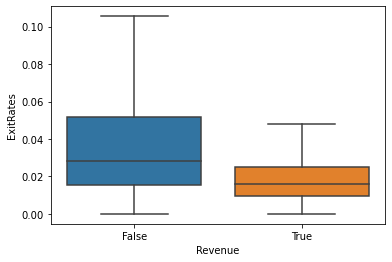

count    10297.000000
mean         0.045526
std          0.048685
min          0.000000
25%          0.015385
50%          0.028382
75%          0.051538
max          0.200000
Name: ExitRates, dtype: float64
count    1908.000000
mean        0.019555
std         0.016463
min         0.000000
25%         0.009521
50%         0.016000
75%         0.025000
max         0.200000
Name: ExitRates, dtype: float64
(23.05708490164272, 3.5454904338682046e-115)


In [36]:
#'ExitRates' vs target 
sns.boxplot(y="ExitRates", x= "Revenue", data=df, showfliers=False)
plt.show()

#Stats for ExitRates data
print((df.loc[df["Revenue"] == 0,"ExitRates"]).describe())
print((df.loc[df["Revenue"] == 1,"ExitRates"]).describe())

#Significance Testing: Calculate p-value for two sampled T-test
stat, p = ttest_ind(df.loc[df["Revenue"] == 0,"ExitRates"], df.loc[df["Revenue"] == 1,"ExitRates"])
print((stat, p))

<b>'PageValues' Data</b>

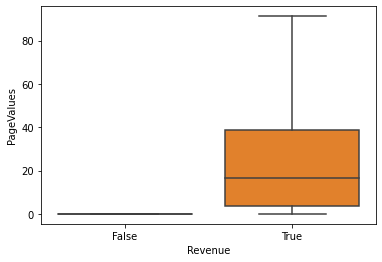

count    10297.000000
mean         1.999985
std          9.124701
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        246.758590
Name: PageValues, dtype: float64
count    1908.000000
mean       27.264518
std        35.191954
min         0.000000
25%         3.641144
50%        16.758134
75%        38.897742
max       361.763742
Name: PageValues, dtype: float64
(-62.410643553336065, 0.0)


In [37]:
#'PageValues' vs target 
sns.boxplot(y="PageValues", x= "Revenue", data=df, showfliers=False)
plt.show()

#Stats for PageValues data
print((df.loc[df["Revenue"] == 0,"PageValues"]).describe())
print((df.loc[df["Revenue"] == 1,"PageValues"]).describe())

#Significance Testing: Calculate p-value for two sampled T-test
stat, p = ttest_ind(df.loc[df["Revenue"] == 0,"PageValues"], df.loc[df["Revenue"] == 1,"PageValues"])
print((stat, p))

<b>'SpecialDay' Data</b>

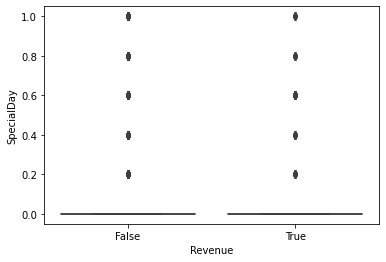

count    10297.000000
mean         0.069127
std          0.209996
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: SpecialDay, dtype: float64
count    1908.000000
mean        0.023166
std         0.123521
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SpecialDay, dtype: float64
(9.267629839624556, 2.2199644461141737e-20)


In [38]:
#'SpecialDay' vs target 
sns.boxplot(y="SpecialDay", x= "Revenue", data=df, showfliers=True)
plt.show()

#Stats for SpecialDay data
print((df.loc[df["Revenue"] == 0,"SpecialDay"]).describe())
print((df.loc[df["Revenue"] == 1,"SpecialDay"]).describe())

#Significance Testing: Calculate p-value for two sampled T-test
stat, p = ttest_ind(df.loc[df["Revenue"] == 0,"SpecialDay"], df.loc[df["Revenue"] == 1,"SpecialDay"])
print((stat, p))

<b>Answer: There are stastically significant differences between nonrevenue- and revenue-generating customers for the following numerical features: Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, BounceRates, ExitRates, PageValues, and SpecialDay.</b>

<b>Question: Since 'PageValues' and 'ExitRates' appear to exhibit a higher correlation with the target feature, can they be used to accurately predict the probability that a customer is non-revenue or revenue-generating?</b>

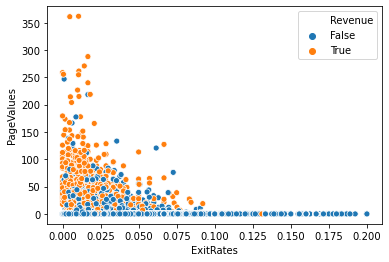

In [39]:
#Create a scatterplot on NOPrediction, where x is distance, y is spent_last_month and hue is Decision 
sns.scatterplot(x="ExitRates", y= "PageValues", data=df, hue="Revenue")

<b>Answer: The features "PageValues" and "ExitRates" would likely be insufficient for the accurate prediction of whether a customer would be nonrevenue or revenue generating. However, this plot does show that for revenue-generating customers, exit rates decreased with increased page values.</b>

<b>Conclusion: Regarding the ad campaign, it seems that the number of visits to the site are practically nonexistent in January and April. Ads and promotions driving customers to the site during these months may lead to increased revenue. The majority of revenue-generating customers use operating systems 1-3. As such, steps should be taken to ensure that the user experience for the website is optimized for customers using the other 4 operating systems. Likewise, the majority of customers are from regions 1-4. Ads targeting customers from regions 5-7 should be considered in order to drive more traffic to the site. In terms of website traffic, the majority of customers arrived at the website via traffic types 1-4. The client should consider utilizing ads to continue to increase traffic from popular web traffic sources. Lastly, the majority of traffic occured during the week versus the weekend. Additional data by day will need to be assessed prior to utilizing this data for the ad campaign strategy.

In addition, numerical features extracted from clickstream and web analytics data (i.e., Google analytics data) may exhibit high predictive power since there were statistically significant differences between nonrevenue and revenue generating customers. As such, this data can be used to optimize the website in order to improve conversions.</b>